# This script plots the HI mass against the Halo Mass 
## General plot for all galaxy types
## Plot separating the types of galaxies: centrals, satellites and orphans
### scatter plots for z=0, z=1
### Contour plots for z=0, z=1

In [1]:
# Code to plot the HI Mass as a function of Halo Mass (Mvir)
# First off, import the packages we need
import numpy as np  # work horse package for numerical work in python
import matplotlib.pyplot as plt  # plotting library
from dragons import meraxes, munge
import random
import sys
from Functions import *

#get gals, snaps, sims_props
snapshot_used = 250 # z = 0
gals, sim_props, snaplist = get_gal_catalogue(snapshot_used)

snaplist_index_used = list(snaplist[0]).index(snapshot_used)# convert to list and find the index of the snap we are using
redshift_used = snaplist[1][snaplist_index_used] # Get the redshift for corresponding snapshot
redshift_used = str(round(redshift_used, 1)) # round float to nearest whole int
# Take a random sample of gals (k = 10^5)
#gals_ran = Random_Sample_Gals(gals, 100000)
gals_ran = gals.sample(n=100000)# one hundred thousand
gals_ran
#gals_ran.shape


,HaloID,ID,Type,CentralGal,GhostFlag,Len,MaxLen,Spin,Mvir,Rvir,...,Pos_1,Pos_2,Vel_0,Vel_1,Vel_2,NewStars_0,NewStars_1,NewStars_2,NewStars_3,NewStars_4
1461284,1081911,2020001081911,0,1461284,0,34,38,0.022504,0.643771,0.032411,...,54.720112,143.644089,-496.668060,-356.275787,-612.417053,1.448941e-06,7.464420e-07,2.528110e-07,9.824206e-06,1.281349e-05
1340759,1134986,1780001134986,0,1340759,0,39,40,0.027738,0.738443,0.033927,...,69.930893,9.082248,-308.697632,8.147855,-171.928116,5.197485e-06,4.625375e-06,1.801020e-06,2.217670e-06,1.515250e-06
538659,168628,1510000168628,1,485405,0,41,65,0.015846,0.776312,0.034498,...,155.717529,84.060982,-166.104919,-205.306488,85.283897,4.126025e-05,1.016771e-05,4.302847e-06,5.262840e-06,2.172485e-05
207939,44301,1110001442653,2,172103,0,32,57,0.050159,0.605902,0.031773,...,139.197037,33.291565,-785.935913,291.637054,380.438019,2.192982e-08,2.184836e-08,2.176400e-08,2.167660e-08,2.158636e-08
1559339,1093686,2250001093686,0,1559339,0,38,40,0.044048,0.719508,0.033635,...,88.403191,42.341755,344.953278,154.672607,78.015671,2.540182e-07,9.355562e-08,5.830684e-08,3.162707e-08,2.704500e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825462,1143949,1770001143949,0,825462,0,37,47,0.038998,0.700574,0.033337,...,74.883179,128.042969,273.800018,-367.897491,-207.663498,1.123313e-06,2.649598e-06,1.401707e-06,8.862282e-07,0.000000e+00
192972,49669,880001769625,2,172176,0,32,216,0.060095,0.605902,0.028924,...,175.507111,155.217133,121.943527,-76.363174,-410.868073,5.815874e-07,5.842690e-07,5.868769e-07,5.894038e-07,5.918531e-07
1607999,1219723,2380001219723,0,1607999,0,34,36,0.043786,0.643771,0.032411,...,125.780586,0.308419,71.653931,1.966417,-289.119385,5.936185e-08,9.176759e-08,1.864247e-08,1.669930e-08,1.313690e-07
965904,953671,1140000953671,0,965904,0,51,60,0.021671,0.965656,0.037101,...,134.923691,52.077698,-173.697235,17.463570,208.818893,2.664384e-05,1.002401e-05,9.185228e-06,9.626683e-06,8.034089e-06


In [2]:
snaplist[0]

array([100, 115, 134, 158, 173, 192, 216, 250])

In [3]:
# Log the masses 
HIMass = np.log10(gals_ran["HIMass"]*1e10)
print('HIMass: ', HIMass, 'no. items: ', HIMass.shape)
Mvir = np.log10(gals_ran["Mvir"]*1e10)
print('Mvir: ', Mvir, 'no. items: ', HIMass.shape)
Type = gals_ran["Type"]

HIMass:  1461284    6.961345
1340759    7.369296
538659     7.256172
207939     6.249313
1559339    7.215640
             ...   
825462     7.172297
192972     6.945707
1607999    6.993069
965904     7.377121
906678     7.757848
Name: HIMass, Length: 100000, dtype: float64 no. items:  (100000,)
Mvir:  1461284     9.808731
1340759     9.868317
538659      9.890036
207939      9.782402
1559339     9.857036
             ...    
825462      9.845454
192972      9.782402
1607999     9.808731
965904      9.984822
906678     10.116101
Name: Mvir, Length: 100000, dtype: float64 no. items:  (100000,)


/Users/jenkinsfamily/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


# SCATTER PLOT z=0
## All galaxies

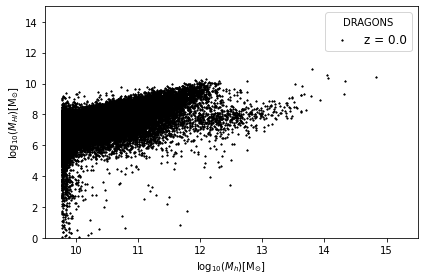

In [4]:
# Now plot the simulation for Cen, Sat and All and the Zwaan 2005 and Martin 2010 dataset on one fig
fig, ax = plt.subplots(1, 1)

label_z = ("z = " + redshift_used)
x = Mvir
y = HIMass
plot = ax.scatter(x, y, color= "black", marker= "*", s=2, label=label_z)  

ax.set_xlabel(r"$\log_{10}(M_{h}) [{\rm M_{\odot}}]$")
ax.set_ylabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
ax.set_ylim([0,15])
ax.set_xlim([9.5,15.5])
# Add the legend
plt.legend(title=("DRAGONS"),
           loc='upper right',
           ncol=5,
           fontsize=12)

# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("Alice_MHI_Mvir" + redshift_used)
plt.savefig("plots/" + name_of_plot + ".pdf")

# SCATTER PLOT z=0
## separated galaxies, Centrals, Satellites, and Orphans

"\noccurrences_cen = np.count_nonzero(Type == 0)\noccurrences_sat = np.count_nonzero(Type == 1)\noccurrences_all = np.count_nonzero(gals)\nprint('Num Centrals = ', occurrences_cen)\nprint('Num Satellites = ', occurrences_sat)\nprint('Num All = ', occurrences_all)\n"

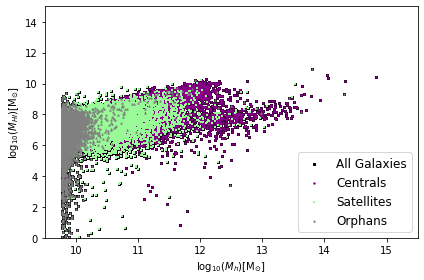

In [5]:
# Now plot the simulation for Cen, Sat and All and the Zwaan 2005 and Martin 2010 dataset on one fig
fig, ax = plt.subplots(1, 1)

label_z = ("z = " + str(redshift_used))
x = Mvir
y = HIMass
all_plt = ax.scatter(x, y, color= "black", marker= "s", s=2)  
centrals_plt = ax.scatter(x[Type==0], y[Type==0], color= "darkmagenta", marker= "o", s=2)  
satellites_plt = ax.scatter(x[Type==1], y[Type==1], color= "palegreen", marker= "+", s=2)  
orphans_plt = ax.scatter(x[Type==2], y[Type==2], color= "gray", marker= "^", s=2)  

ax.set_xlabel(r"$\log_{10}(M_{h}) [{\rm M_{\odot}}]$")
ax.set_ylabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
ax.set_ylim([0,15])
ax.set_xlim([9.5,15.5])
# Add the legend
plt.legend((all_plt, centrals_plt, satellites_plt, orphans_plt),
           ('All Galaxies', 'Centrals', 'Satellites', 'Orphans'),
           scatterpoints=1,
           loc='lower right',
           fontsize=12)

# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("Alice_MHI_Mvir_CenSatAll" + redshift_used)
plt.savefig("plots/" + name_of_plot + ".pdf")
'''
occurrences_cen = np.count_nonzero(Type == 0)
occurrences_sat = np.count_nonzero(Type == 1)
occurrences_all = np.count_nonzero(gals)
print('Num Centrals = ', occurrences_cen)
print('Num Satellites = ', occurrences_sat)
print('Num All = ', occurrences_all)
'''

## z=1

In [6]:
# z=1 
snapshot_used_1 = 192
gals_1, sim_props_1, snaplist_1 = get_gal_catalogue(snapshot_used_1)
snaplist_index_used_1 = list(snaplist_1[0]).index(snapshot_used_1)# convert to list and find the index of the snap we are using
redshift_used_1 = snaplist_1[1][snaplist_index_used_1] # Get the redshift for corresponding snapshot
redshift_used_1 = str(round(redshift_used_1, 1)) # round float to nearest whole int
gals_ran_1 = gals_1.sample(n=10000)
gals_ran_1
# Log the masses 
HIMass_1 = np.log10(gals_ran_1["HIMass"]*1e10)
print('HIMass: ', HIMass_1, 'no. items: ', HIMass_1.shape)
Mvir_1 = np.log10(gals_ran_1["Mvir"]*1e10)
print('Mvir: ', Mvir_1, 'no. items: ', HIMass_1.shape)
Type_1 = gals_ran_1["Type"]

HIMass:  1700257    7.804001
924828     8.774200
187291     8.062870
1032589    7.448699
419441     7.675930
             ...   
452936     8.080843
256046     6.497628
1173214    7.108155
1646831    7.753273
207629     7.823852
Name: HIMass, Length: 10000, dtype: float32 no. items:  (10000,)
Mvir:  1700257     9.930465
924828     10.532525
187291     10.152313
1032589    10.250381
419441     10.128510
             ...    
452936      9.795766
256046      9.821321
1173214    10.025440
1646831    10.206671
207629      9.910721
Name: Mvir, Length: 10000, dtype: float32 no. items:  (10000,)


/Users/jenkinsfamily/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


# SCATTER PLOT z=1
## All galaxies

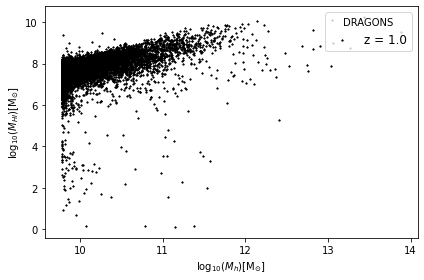

In [7]:
# Now plot the simulation for Cen, Sat and All and the Zwaan 2005 and Martin 2010 dataset on one fig
fig, ax = plt.subplots(1, 1)

label_z_1 = ("z = " + redshift_used_1)
x_1 = Mvir_1
y_1 = HIMass_1
plot = ax.scatter(x_1, y_1, color= "black", marker= "*", s=2, label=label_z_1)  

ax.set_xlabel(r"$\log_{10}(M_{h}) [{\rm M_{\odot}}]$")
ax.set_ylabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
#ax.set_ylim([0,15])
#ax.set_xlim([9.5,15.5])
# Add the legend
plt.legend(title=("DRAGONS"),
           loc='upper right',
           ncol=5,
           fontsize=12)

# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("Alice_MHI_Mvir" + redshift_used_1)
plt.savefig("plots/" + name_of_plot + ".pdf")

## Separated galaxies: Centrals, Satellites and Orphans.

"\noccurrences_cen = np.count_nonzero(Type == 0)\noccurrences_sat = np.count_nonzero(Type == 1)\noccurrences_all = np.count_nonzero(gals)\nprint('Num Centrals = ', occurrences_cen)\nprint('Num Satellites = ', occurrences_sat)\nprint('Num All = ', occurrences_all)\n"

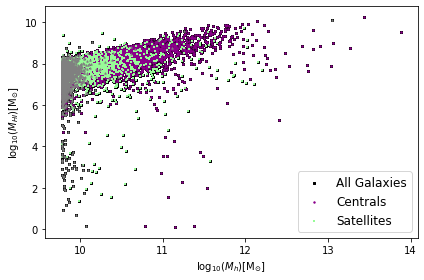

In [8]:
# Now plot the simulation for Cen, Sat and All and the Zwaan 2005 and Martin 2010 dataset on one fig
fig, ax = plt.subplots(1, 1)

label_z_1 = ("z = " + str(redshift_used_1))
x_1 = Mvir_1
y_1 = HIMass_1
all_plt_1 = ax.scatter(x_1, y_1, color= "black", marker= "s", s=2)  
centrals_plt_1 = ax.scatter(x_1[Type_1==0], y_1[Type_1==0], color= "darkmagenta", marker= "o", s=2)  
satellites_plt_1 = ax.scatter(x_1[Type_1==1], y_1[Type_1==1], color= "palegreen", marker= "+", s=2)  
orphans_plt_1 = ax.scatter(x_1[Type_1==2], y_1[Type_1==2], color= "gray", marker= "^", s=2)  

ax.set_xlabel(r"$\log_{10}(M_{h}) [{\rm M_{\odot}}]$")
ax.set_ylabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
#ax.set_ylim([0,15])
#ax.set_xlim([9.5,15.5])
# Add the legend
plt.legend((all_plt_1, centrals_plt_1, satellites_plt_1),
           ('All Galaxies', 'Centrals', 'Satellites'),
           scatterpoints=1,
           loc='lower right',
           fontsize=12)

# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("Alice_MHI_Mvir_CenSatAll" + redshift_used_1)
plt.savefig("plots/" + name_of_plot + ".pdf")
'''
occurrences_cen = np.count_nonzero(Type == 0)
occurrences_sat = np.count_nonzero(Type == 1)
occurrences_all = np.count_nonzero(gals)
print('Num Centrals = ', occurrences_cen)
print('Num Satellites = ', occurrences_sat)
print('Num All = ', occurrences_all)
'''